In [1]:
import csv
import pandas as pd

import os
import sys

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%load_ext autoreload
%autoreload 2
    
from experiments.pretraining_vs_finetuning.finetuning_volume.volume_buckets import finetuning_proportion_buckets

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 33630.84it/s]


In [2]:
import numpy as np
import seaborn as sns
import matplotlib

def plot_isocurves(ax: matplotlib.axes.Axes):
    
    # plot the isocurves
    bernoullis = np.linspace(0, 1, 1000)
    total_variance = bernoullis * (1-bernoullis)
    
    pove_percentages = [i / 10 for i in range(10)]
    palette = sns.color_palette("flare", len(pove_percentages)) #crest
    
    for i, pove in enumerate(pove_percentages):
        min_pstay = 1 - 2*((1-pove)*total_variance) # 2 * UV, but max is when all variance is UV
        ax.plot(bernoullis, min_pstay, '--', alpha=0.3, color=palette[i])
        annotation_point = 750
        curve_text = f"{100 - int(100 * pove)}% PVAP" if pove > 0 else "Min P(STAY)"
        ax.annotate(
            curve_text, 
            (bernoullis[annotation_point], min_pstay[annotation_point]+ 0.008), 
            rotation=20, 
            horizontalalignment='center', 
            verticalalignment='center', 
            alpha=0.3, 
            color='black',
            fontsize=8
        )

Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.


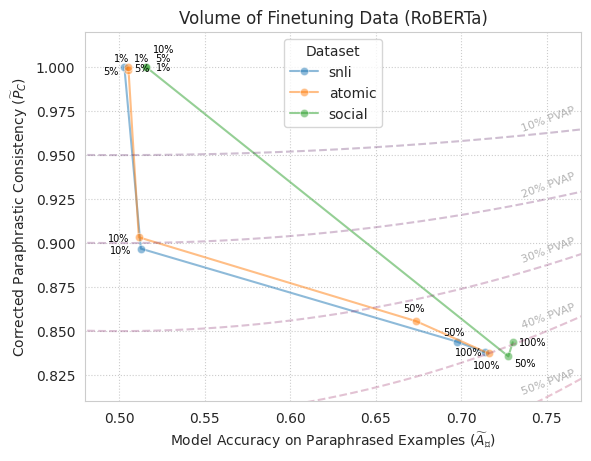

In [67]:
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': ':'})
import matplotlib.pyplot as plt


def plot_finetuning_trend(dataset):
    x = []
    y = []
    
    for prop, datasets in finetuning_proportion_buckets.items():
    
        summary = datasets[f'{dataset}-human'].linguistic_robustness_summary(datasets[f'{dataset}-test'])
        acc = summary['paraphrase_accuracy_corrected'] #datasets[f'{dataset}-test'].accuracy
        p_stay_c = summary['stay_prob_corrected']
        
        x.append(acc)
        y.append(p_stay_c)
    
    sns.lineplot(x=x, y=y, marker='o', label=dataset, alpha=0.5)
    for i, words in enumerate(list(finetuning_proportion_buckets.keys())):

        dataset_offsets = {
            'social': {0.01: [0.01, 0], 0.05: [0.01, 0.005], 0.1: [0.01, 0.01],0.5: [0.007, -0.012], 1: [0.014, 0.008]},
            'snli': {0.01: [0.01, 0.005], 0.05: [0.01, -0.001], 0.1: [-0.012, -0.001], 0.5: [-0.002, 0.005], 1: [-0.009, 0]},
            'atomic': {0.01: [-0.004, 0.005], 0.05: [-0.01, -0.001], 0.1: [-0.012, -0.001], 0.5: [-0.001, 0.007], 1: [-0.001, -0.007]},
        }

        x_offset = dataset_offsets[dataset][words][0] if words in dataset_offsets[dataset].keys() else 0.01
        y_offset = dataset_offsets[dataset][words][1] if words in dataset_offsets[dataset].keys() else -0.01
        
        
        plt.text(x[i]+x_offset, y[i]+y_offset, f'{int(words * 100)}%', fontsize=7, ha='center', va='center', color='black')

plot_finetuning_trend('snli')
plot_finetuning_trend('atomic')
plot_finetuning_trend('social')

ax = plt.gca()
plot_isocurves(ax)
plt.xlabel("Model Accuracy on Paraphrased Examples ($\widetilde{A}_{🪣}$)")
plt.ylabel(r"Corrected Paraphrastic Consistency ($\widetilde{P}_C$)")

plt.legend(title='Dataset', loc='upper center')

plt.xlim(0.5 - 0.02, 0.75 + 0.02)  # set x-axis limits from -2 to 2
plt.ylim(0.83 - 0.02, 1 + 0.02)

plt.title(f'Volume of Finetuning Data (RoBERTa)')
plt.savefig(f'finetuning.pdf')
plt.show()

In [ ]:
including autogen examples and project label through during finetuning 

1, 5, 10, 50, 100


as the model starts to learn, it is more likely to be inconsistent (wrong distinctions between paraphrased examples)
it's possible with more data that we see a dip back up for p(stay) but no guarantees